In [2]:
import re
def get_eval_values(path:str):
    pattern = re.compile("= \d.\d\d\d\d?")
    
    v=[]

    for i, line in enumerate(open(path, 'r')):
        for match in re.finditer(pattern, line):
            v.append(float(match.group()[2:]))

    return {'mAP': v[0], 'mAP.5': v[1], 'mAP.75': v[2], 'mAPs': v[3], 'mAPm': v[4], 'mAPl': v[5], 'LAMR': round(v[12], 3)}

In [39]:
import string
import pandas as pd
path = 'PIROPO/test2_'

values = []
values.append([0,'a'] + list(get_eval_values(path + '0.txt').values()))
for n in [1,2,5,10,20,50,100,200,500,1000]:
    for l in range(10):
        values.append([n, string.ascii_lowercase[l]] + list(get_eval_values(path + str(n) + string.ascii_lowercase[l] + '.txt').values()))
values.append([2357,'a'] + list(get_eval_values(path + 'all.txt').values()))
df = pd.DataFrame(values, columns=['# training images','idx','AP','AP@.5','AP@.75','AP S','AP M','AP L','LAMR'])

In [40]:
df

,# training images,idx,AP,AP@.5,AP@.75,AP S,AP M,AP L,LAMR
0,0,a,0.383,0.594,0.441,0.070,0.420,0.698,0.463
1,1,a,0.414,0.648,0.464,0.121,0.447,0.702,0.411
2,1,b,0.421,0.664,0.471,0.145,0.451,0.697,0.399
3,1,c,0.393,0.617,0.456,0.086,0.428,0.696,0.439
4,1,d,0.424,0.667,0.477,0.094,0.465,0.695,0.406
...,...,...,...,...,...,...,...,...,...
97,1000,g,0.681,0.964,0.813,0.478,0.706,0.774,0.058
98,1000,h,0.690,0.966,0.837,0.481,0.719,0.808,0.049
99,1000,i,0.684,0.966,0.821,0.486,0.712,0.778,0.051
100,1000,j,0.685,0.965,0.816,0.489,0.710,0.787,0.055


In [41]:
df_tidy = df.melt(id_vars=['# training images','idx'], var_name='metric')
df_tidy

,# training images,idx,metric,value
0,0,a,AP,0.383
1,1,a,AP,0.414
2,1,b,AP,0.421
3,1,c,AP,0.393
4,1,d,AP,0.424
...,...,...,...,...
709,1000,g,LAMR,0.058
710,1000,h,LAMR,0.049
711,1000,i,LAMR,0.051
712,1000,j,LAMR,0.055


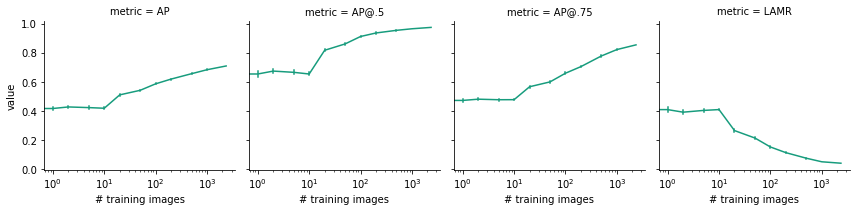

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_palette(sb.color_palette(['#179C7D']))
# fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 4.5))
# ax[0].set_title('AP')
# ax[1].set_title('AP@0.5')
# ax[2].set_title('LAMR')

# ax[0].plot()
g = sb.FacetGrid(df_tidy[df_tidy['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
# g.add_legend()
# g.fig.subplots_adjust(hspace=.3)
plt.xscale('log')
# sb.lineplot(x='split', y='mAP', data=df)
